## 1000_companies_profit

In [332]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from matplotlib.image import imread
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split #import the splitting module
pd.set_option('display.max_rows', 500)
pd. set_option('display.max_columns', 500)
#import missingno as msno
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


In [333]:
df = pd.read_csv("1000_Companies.csv")

In [334]:
df1 = df.copy()

In [335]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [336]:
df.shape

(1000, 5)

In [337]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [338]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [340]:
pd.DataFrame({"values":{col:df[col].unique() for col in df},'type':{col:df[col].dtype for col in df}})

,values,type
R&D Spend,"[165349.2, 162597.7, 153441.51, 144372.41, 142...",float64
Administration,"[136897.8, 151377.59, 101145.55, 118671.85, 91...",float64
Marketing Spend,"[471784.1, 443898.53, 407934.54, 383199.62, 36...",float64
State,"[New York, California, Florida]",object
Profit,"[192261.83, 191792.06, 191050.39, 182901.99, 1...",float64


In [341]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [342]:
df['State'].value_counts()

California    344
New York      334
Florida       322
Name: State, dtype: int64

## EXPLANATORY DATA ANALYSIS

Univariate Analysis

Upon analyzing the density plot and box plots, it becomes apparent that the Administration cost and Profit (target variable) exhibit outliers, displaying a positive skew towards the right.

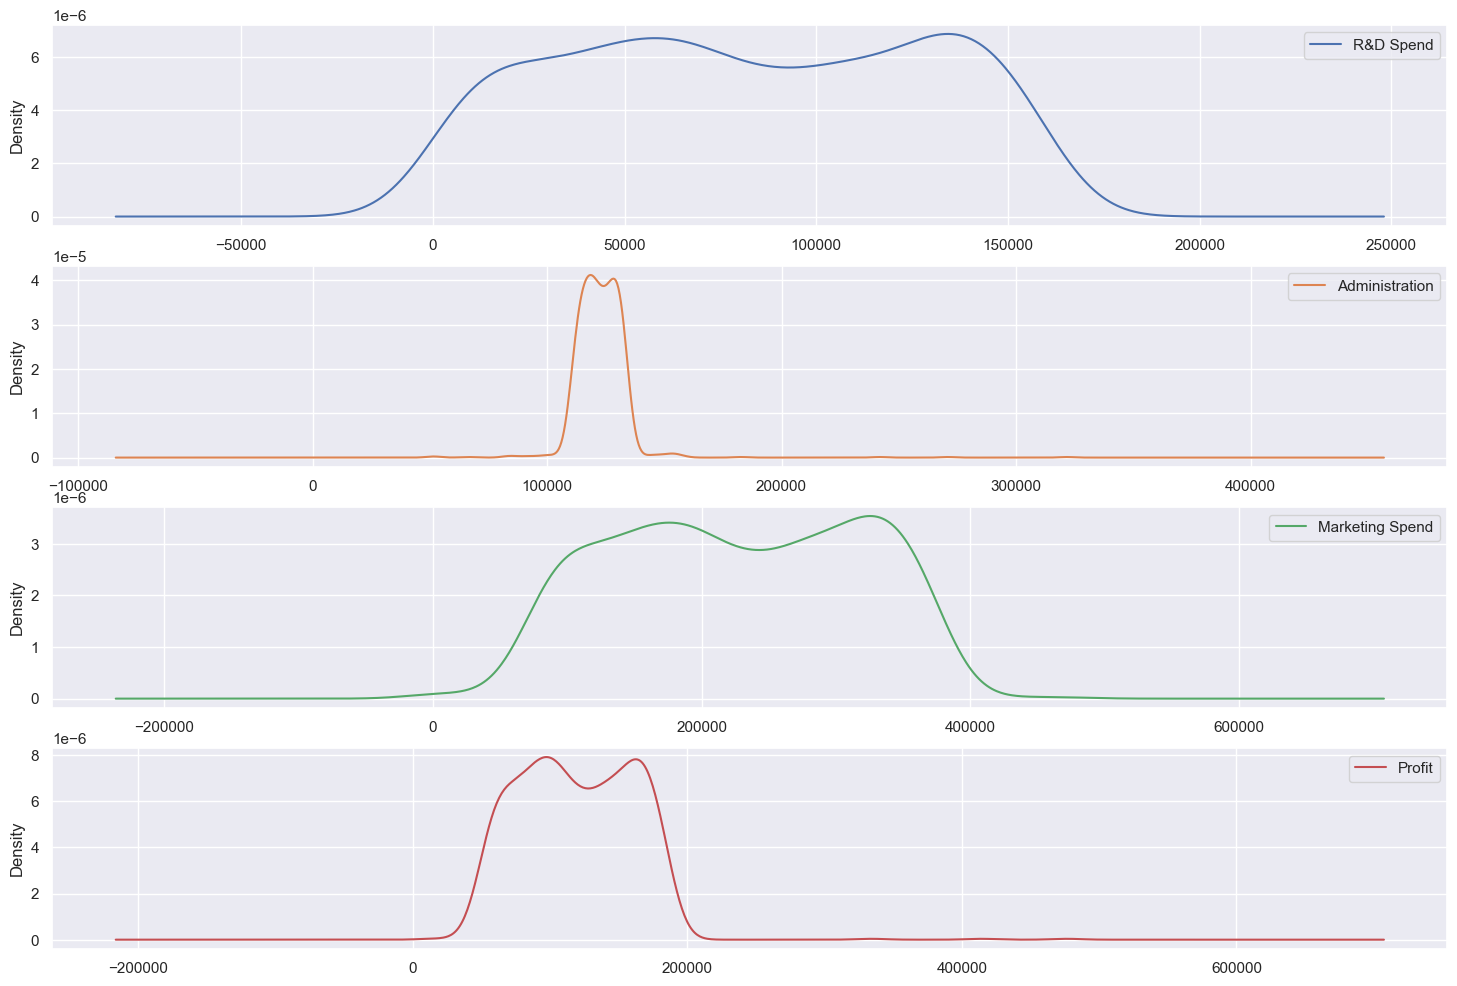

In [343]:
df.plot(kind='density', subplots=True, layout=(4,1), sharex=False, figsize=(18,12))
plt.show()


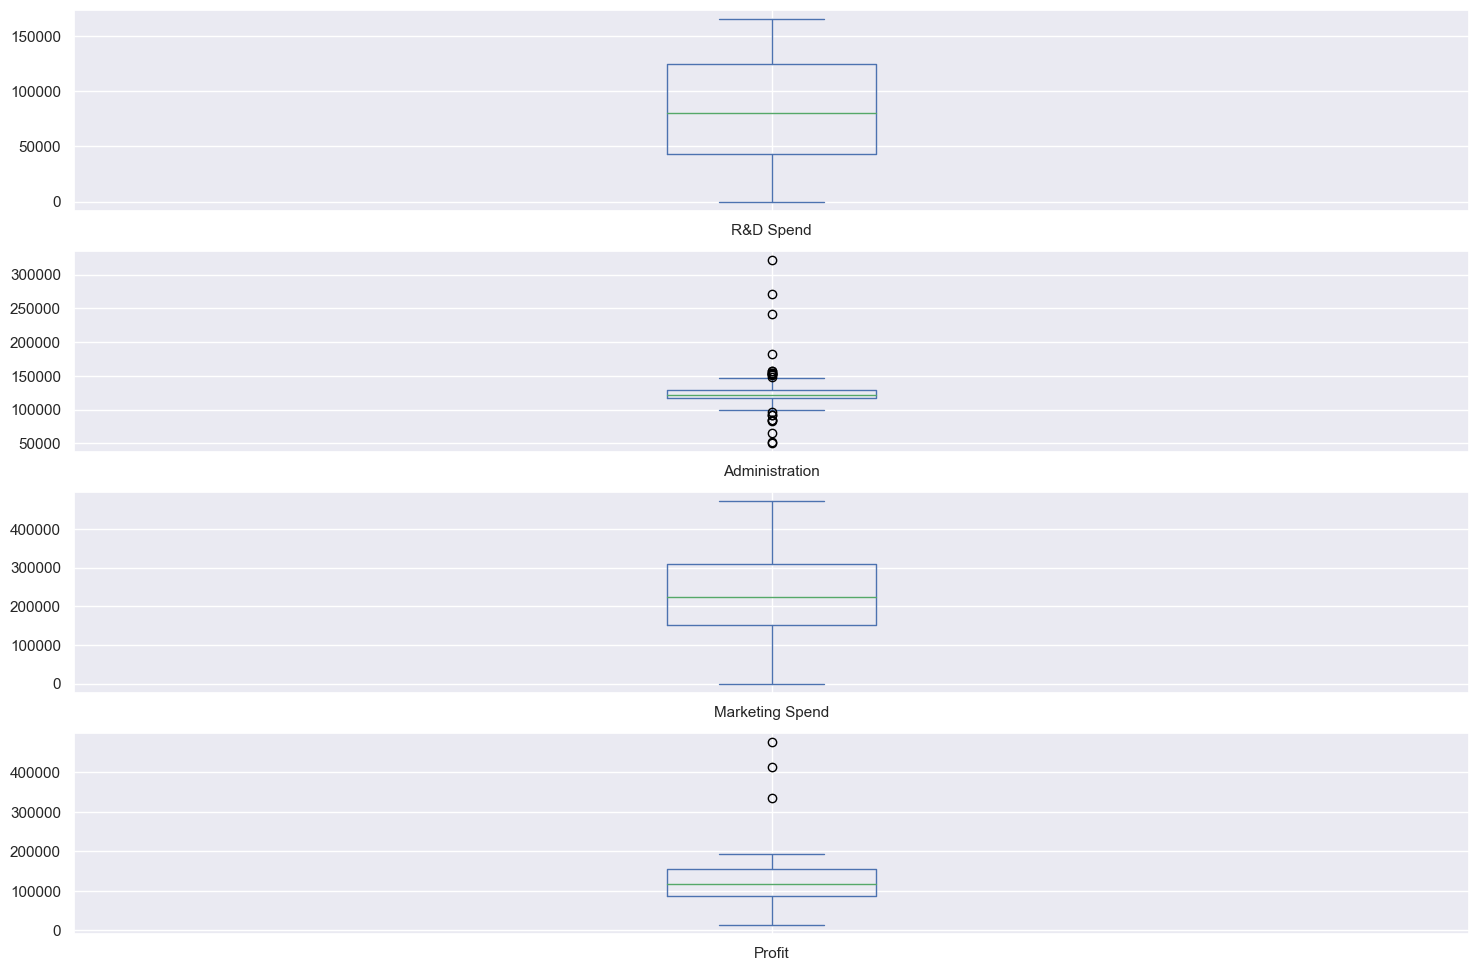

In [344]:
df.plot(kind='box', subplots=True, layout=(4,1), sharex=False, figsize=(18,12))
plt.show()


Bivariate analysis

Upon examining the scatter plots, it is evident that both R&D Spend and Marketing Spend exhibit a significant positive correlation with Profit. However, the relationship between Administration and Profit does not display a strong association.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


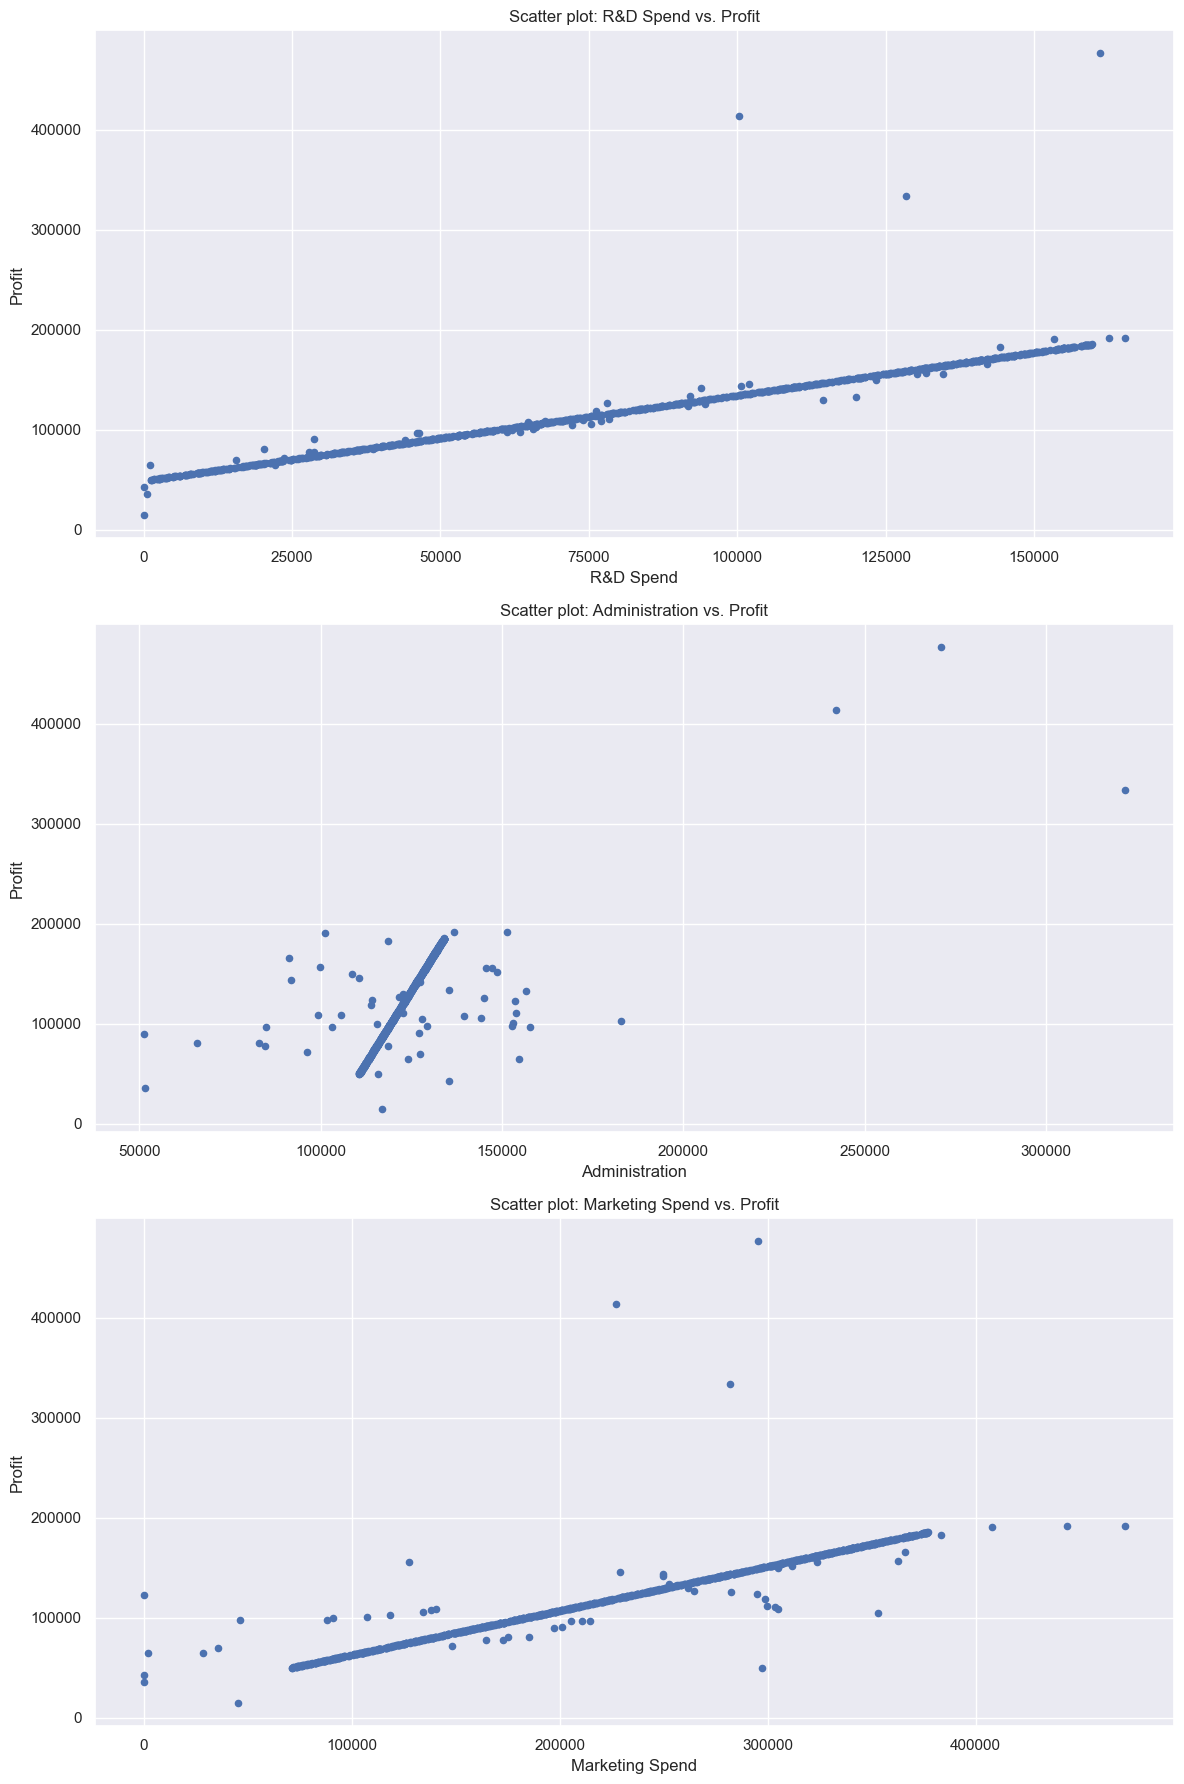

In [345]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

df.plot(kind='scatter', x='R&D Spend', y='Profit', ax=axes[0])
axes[0].set_title('Scatter plot: R&D Spend vs. Profit')

df.plot(kind='scatter', x='Administration', y='Profit', ax=axes[1])
axes[1].set_title('Scatter plot: Administration vs. Profit')

df.plot(kind='scatter', x='Marketing Spend', y='Profit', ax=axes[2])
axes[2].set_title('Scatter plot: Marketing Spend vs. Profit')

plt.tight_layout()
plt.show()


Multivariate Analysis

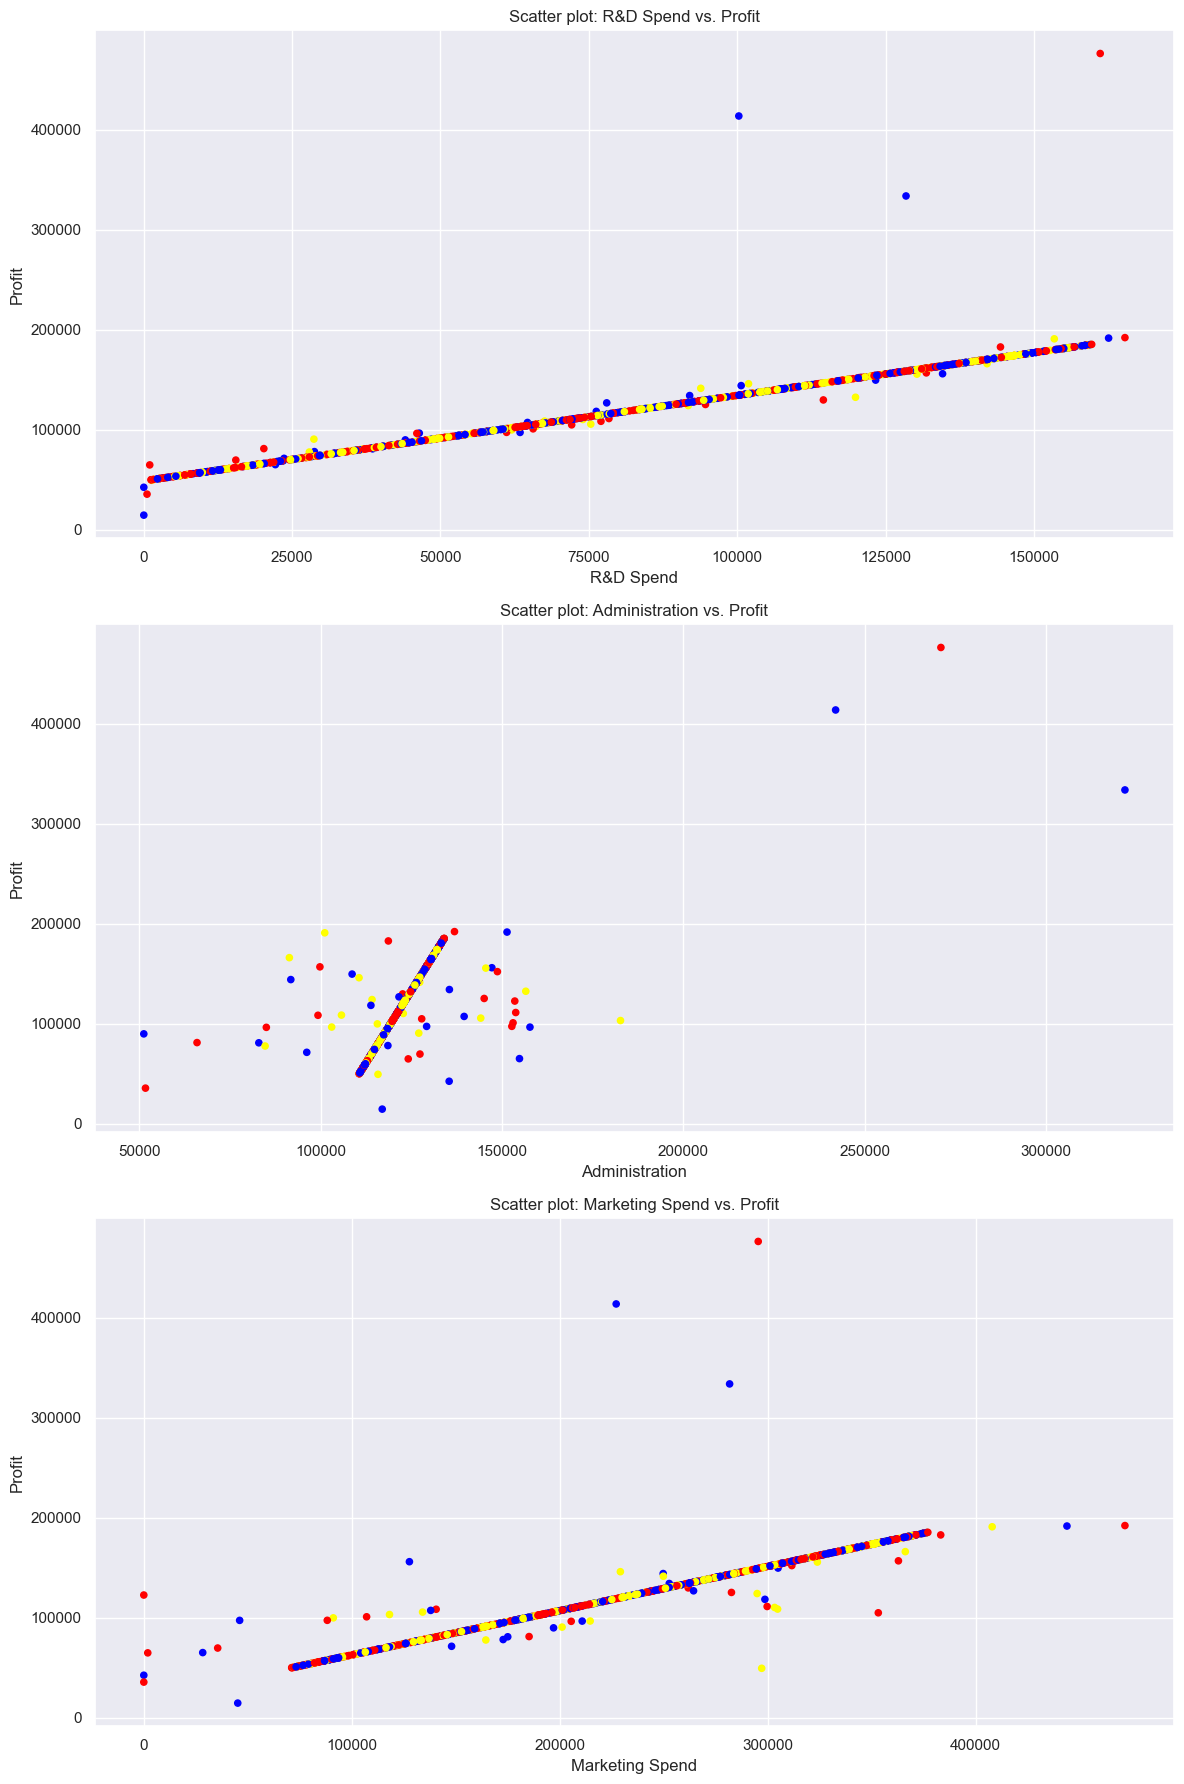

In [346]:
color_mapping = {'New York': 'red', 'California': 'blue', 'Florida': 'yellow'}

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

df.plot(kind='scatter', x='R&D Spend', y='Profit', c=df['State'].map(color_mapping), ax=axes[0])
axes[0].set_title('Scatter plot: R&D Spend vs. Profit')

df.plot(kind='scatter', x='Administration', y='Profit', c=df['State'].map(color_mapping), ax=axes[1])
axes[1].set_title('Scatter plot: Administration vs. Profit')

df.plot(kind='scatter', x='Marketing Spend', y='Profit', c=df['State'].map(color_mapping), ax=axes[2])
axes[2].set_title('Scatter plot: Marketing Spend vs. Profit')

plt.tight_layout()
plt.show()




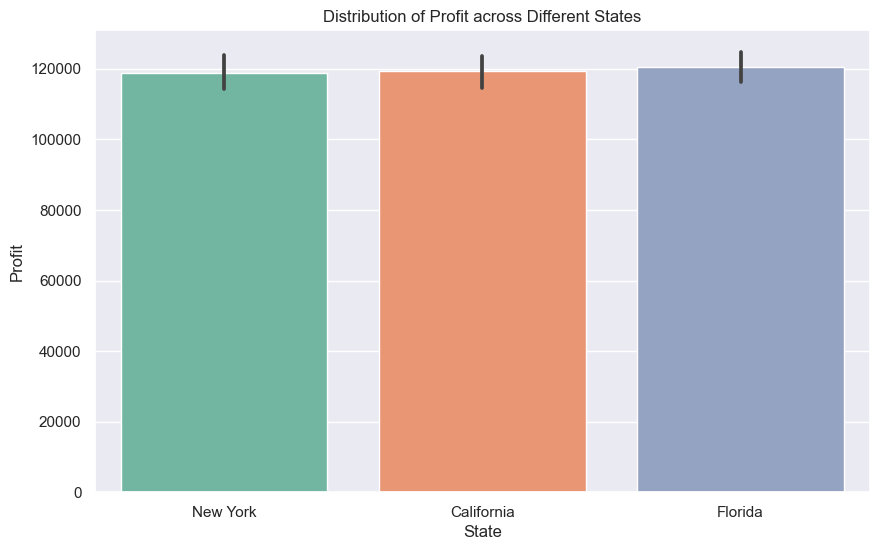

In [347]:
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Profit', palette='Set2', data=df)
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('Distribution of Profit across Different States')
plt.show()


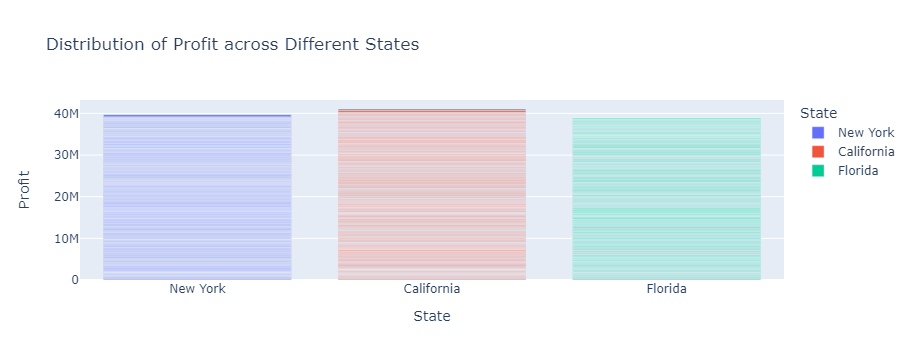

In [348]:
fig = px.bar(df, x='State', y='Profit', color='State', title='Distribution of Profit across Different States')
fig.update_layout(xaxis_title='State', yaxis_title='Profit')
fig.show()


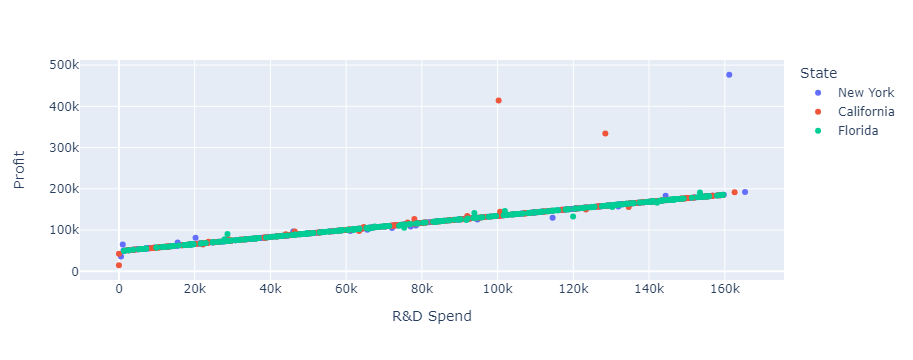

In [349]:
px.scatter(df, x="R&D Spend", y="Profit", color='State')

In [404]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


The correlation heatmap visualizes the relationships between numerical features, with a focus on their correlation with the target variable (Profit). The heatmap highlights strong positive correlations between Profit and both R&D Spend and Marketing Spend. This suggests that increasing investments in R&D and marketing may positively impact the Profit.

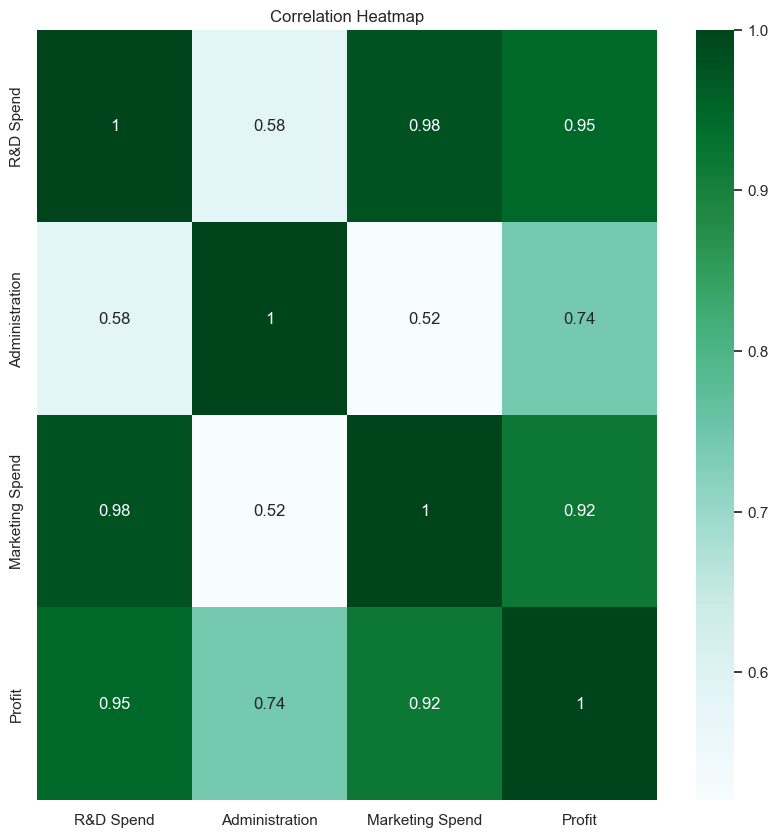

In [350]:
# Compute the correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap="BuGn", ax=ax)
ax.set_title("Correlation Heatmap")
plt.show()

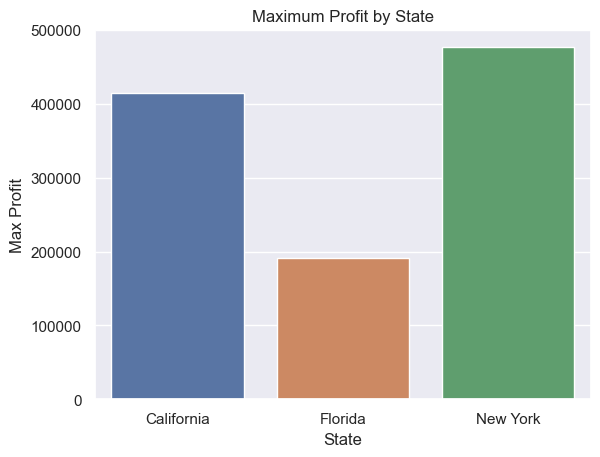

In [351]:
sns.barplot(x=max_profit_by_state.index, y=max_profit_by_state.values)
plt.xlabel('State')
plt.ylabel('Max Profit')
plt.title('Maximum Profit by State')
plt.show()

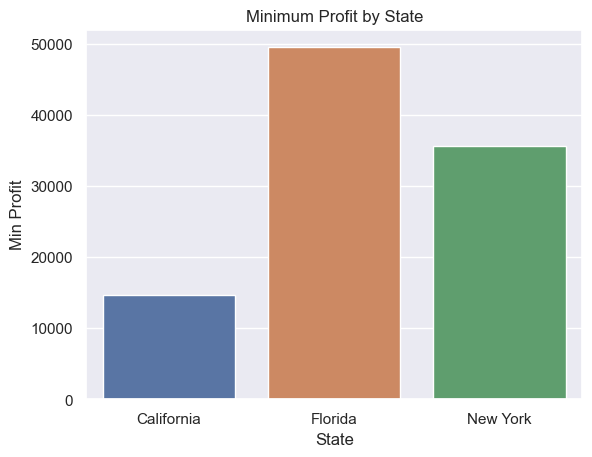

In [352]:
min_profit_by_state = df.groupby('State')['Profit'].min()
sns.barplot(x=min_profit_by_state.index, y=min_profit_by_state.values)
plt.xlabel('State')
plt.ylabel('Min Profit')
plt.title('Minimum Profit by State')
plt.show()

## MODEL BUILDING

Data preprocessing

In [353]:
train,test = train_test_split(df1, test_size=0.2, random_state=123)

In [354]:
#A1
train.reset_index(drop=True, inplace=True)

In [355]:
print(df1.shape)
print(train.shape)
print(test.shape)

(1000, 5)
(800, 5)
(200, 5)


In [356]:
train.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,112421.0,127059.941,285695.6657,California,145073.18940
1,52981.0,118281.571,171006.0234,California,94294.11026


In [357]:
train.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [358]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        800 non-null    float64
 1   Administration   800 non-null    float64
 2   Marketing Spend  800 non-null    float64
 3   State            800 non-null    object 
 4   Profit           800 non-null    float64
dtypes: float64(4), object(1)
memory usage: 31.4+ KB


In [359]:
train.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,800.000000,800.000000,800.000000,800.000000
mean,81463.598063,123110.658295,225865.545809,119551.277280
std,46718.907930,13040.941378,91885.132819,43805.563767
min,0.000000,51283.140000,0.000000,14681.400000
25%,41767.000000,116420.044125,148334.985550,84714.086830
50%,79030.500000,122377.380650,224517.887350,116864.488300
75%,124727.750000,129208.677400,309128.511625,155813.767625
max,165349.200000,321652.140000,471784.100000,476485.430000


In [360]:
train.duplicated().sum()

0

In [361]:
#max_profit_by_state = df1.groupby('State')['Profit'].max()
#print(max_profit_by_state)


In [362]:
#min_profit_by_state = df1.groupby('State')['Profit'].min()
#print(min_profit_by_state)


In [363]:
for i in train.columns:
    if train[i].dtype == 'O':
        print(f"{i} has {train[i].nunique()}categories\nThey are:\n{train[i].unique()}\n")

State has 3categories
They are:
['California' 'New York' 'Florida']



Feature Engineering and Transformation

In [364]:
#A2
train['Total Spend'] = train['R&D Spend'] + train['Administration'] + train['Marketing Spend']

In [365]:
train.head(1)

,R&D Spend,Administration,Marketing Spend,State,Profit,Total Spend
0,112421.0,127059.941,285695.6657,California,145073.1894,525176.6067


In [366]:
#A3
train['Profit Margin'] = (train['Profit'] / train['Total Spend']) * 100

Drop Outliers

In [367]:
def drop_outlier(data,var):
    q1, q3 = np.percentile(data[var], [25, 75])
    iqr = q3-q1
    lower = q1-1.5*iqr
    upper = q3 + 1.5*iqr
    
    data = data[data[var]< upper]
    data = data[data[var]> lower]
    data.reset_index(drop=True, inplace = True)
    return data

In [368]:
#A4
train = drop_outlier(train,'Administration')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Administration', ylabel='Density'>

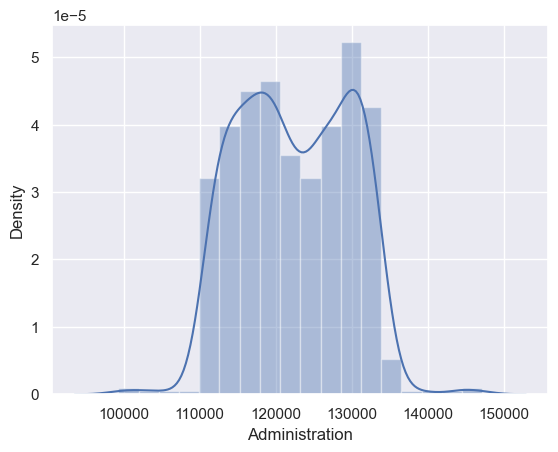

In [369]:
sns.distplot(train['Administration'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Administration'>

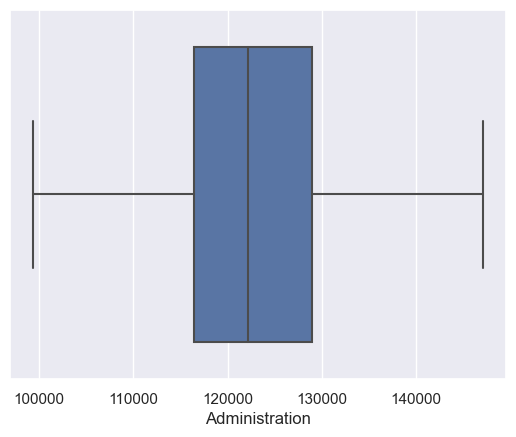

In [370]:
sns.boxplot(train['Administration'])

In [371]:
#A5
train = drop_outlier(train,'Profit')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Profit', ylabel='Density'>

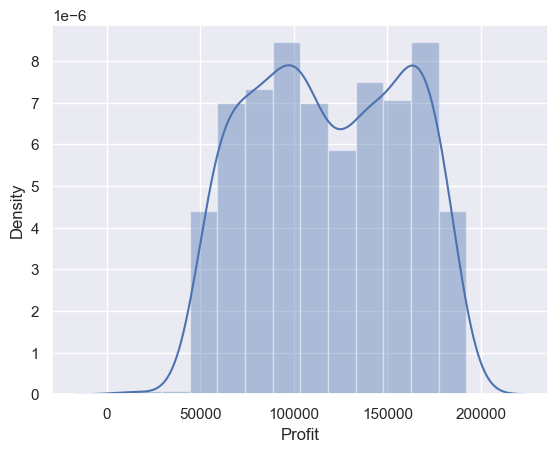

In [372]:
sns.distplot(train['Profit'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Profit'>

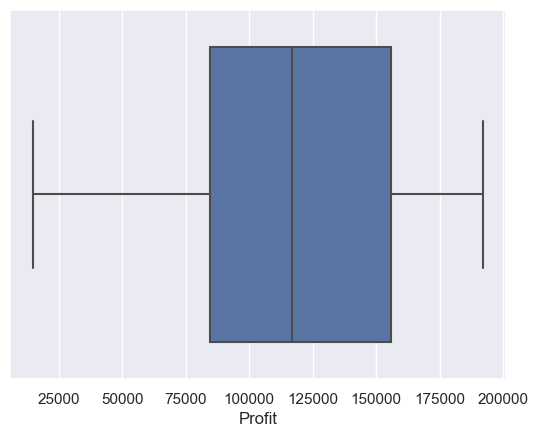

In [373]:
sns.boxplot(train['Profit'])

In [374]:
coll = train.columns

In [375]:
#A6
X_train = train.drop(['Profit'], axis=1)
y_train = train['Profit']

In [376]:
cols = X_train.columns

In [377]:
#A7
encoder = OneHotEncoder(drop='first',dtype=int)
enc_data = pd.DataFrame(encoder.fit_transform(X_train[['State']]).toarray())
enc_data.columns = encoder.get_feature_names_out()
enc_data

,State_Florida,State_New York
0,0,0
1,0,0
2,0,1
3,1,0
4,0,0
...,...,...
779,1,0
780,0,1
781,0,0
782,0,1


In [378]:
#A7
X_train.drop(['State'], axis=1, inplace=True)

In [379]:
#A8
X_train.reset_index(drop=True, inplace=True)

In [380]:
#A9
X_train = X_train.join(enc_data)

In [381]:
X_train.head(2)

,R&D Spend,Administration,Marketing Spend,Total Spend,Profit Margin,State_Florida,State_New York
0,112421.0,127059.941,285695.6657,525176.6067,27.623696,0,0
1,52981.0,118281.571,171006.0234,342268.5944,27.549741,0,0


In [382]:
#A10
cols1 = X_train.columns

In [383]:
#A11
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=cols1) 

In [384]:
X_train.head(2)

,R&D Spend,Administration,Marketing Spend,Total Spend,Profit Margin,State_Florida,State_New York
0,0.663352,0.631814,0.651308,0.659396,0.025234,-0.702377,-0.698331
1,-0.609495,-0.583255,-0.602450,-0.608547,-0.023259,-0.702377,-0.698331


In [405]:
X_train.corr()

,R&D Spend,Administration,Marketing Spend,Total Spend,Profit Margin
R&D Spend,1.000000,0.927447,0.983374,0.993754,0.061925
Administration,0.927447,1.000000,0.893797,0.917097,0.097052
Marketing Spend,0.983374,0.893797,1.000000,0.997230,-0.068629
Total Spend,0.993754,0.917097,0.997230,1.000000,-0.018612
Profit Margin,0.061925,0.097052,-0.068629,-0.018612,1.000000


<AxesSubplot:>

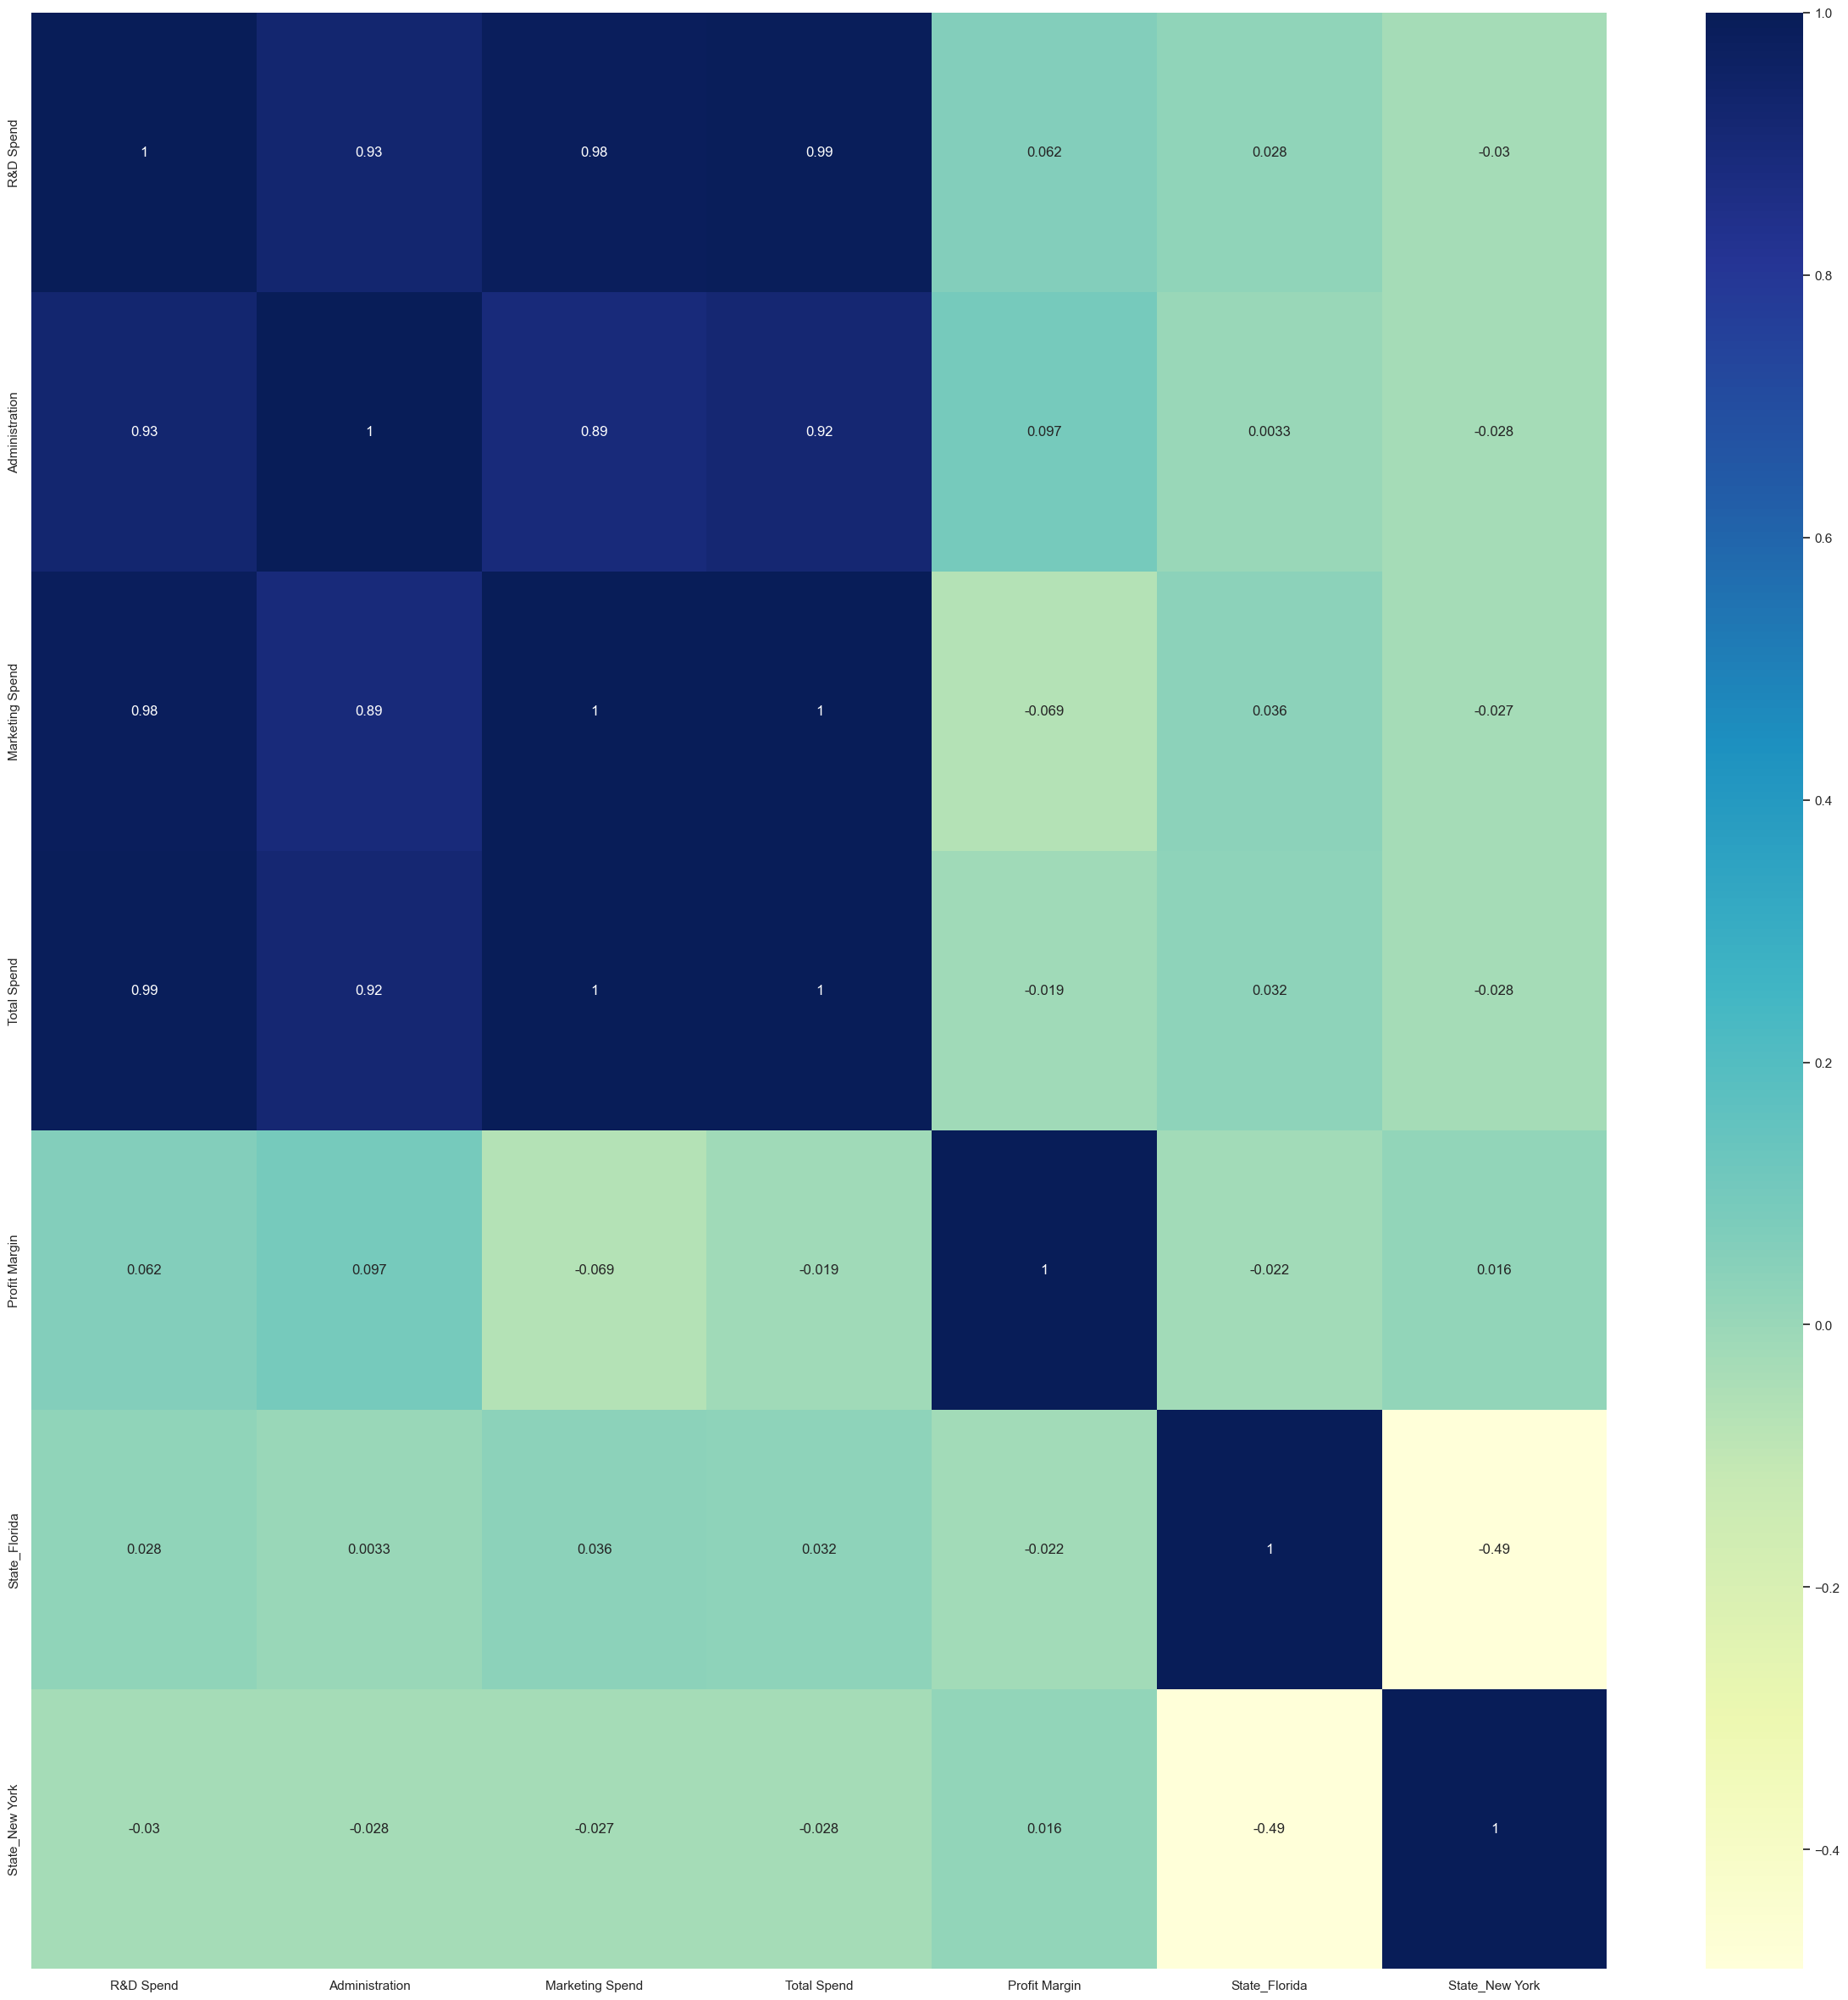

In [385]:
plt.figure(figsize=(30, 30))
cors = X_train.corr()
sns.heatmap(cors, annot=True, cmap="YlGnBu")

<AxesSubplot:>

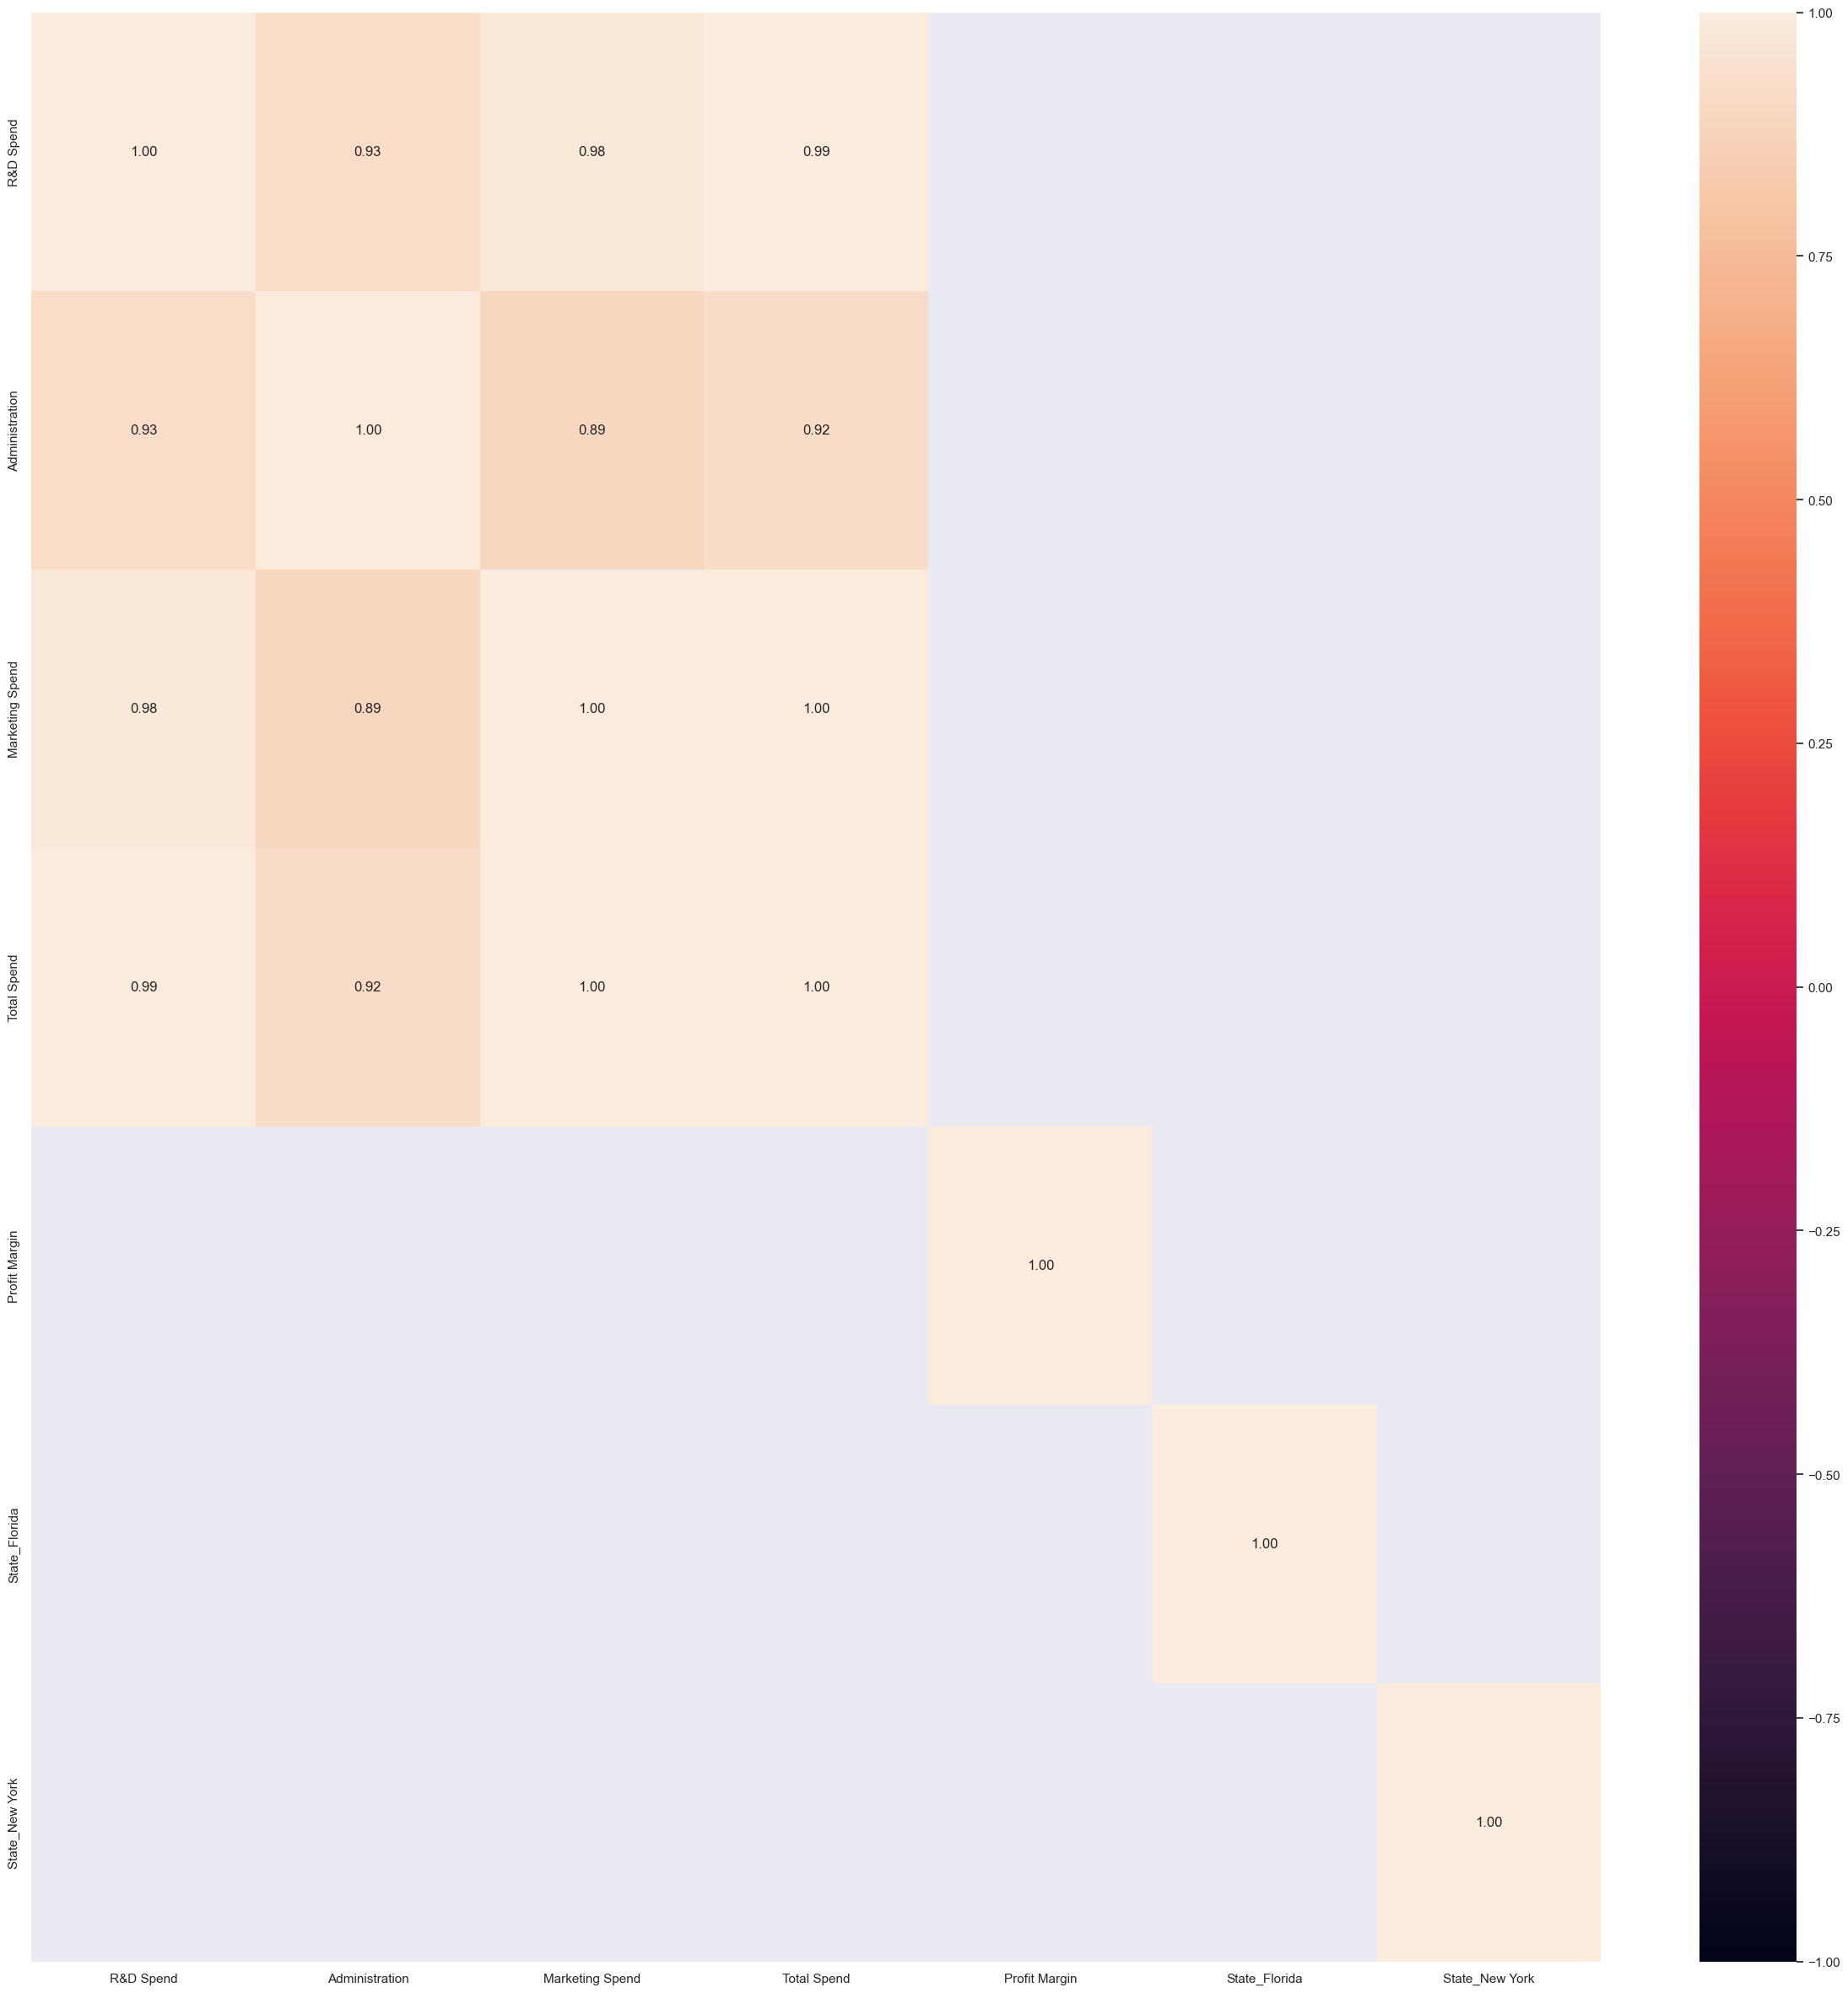

In [386]:
mask = cors[(cors>=0.85)|(cors<=-0.85)]
plt.figure(figsize=(30,30))
sns.heatmap(mask,vmin=-1,annot=True,fmt='0.2f')

In [387]:
import random

In [388]:
from sklearn.feature_selection import mutual_info_regression

seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)

# Compute feature importances using Mutual Information
feature_scores = mutual_info_regression(X_train, y_train)
coef = pd.Series(feature_scores, index=['R&D Spend', 'Administration', 'Marketing Spend', 'Total Spend', 'Profit Margin', 'State_Florida', 'State_New York']).sort_values(ascending=False)
coef = coef.to_frame()

print(coef)


                        0
R&D Spend        5.209826
Total Spend      5.152980
Marketing Spend  5.133035
Administration   5.090356
Profit Margin    2.473970
State_Florida    0.000000
State_New York   0.000000


<Figure size 1500x600 with 0 Axes>

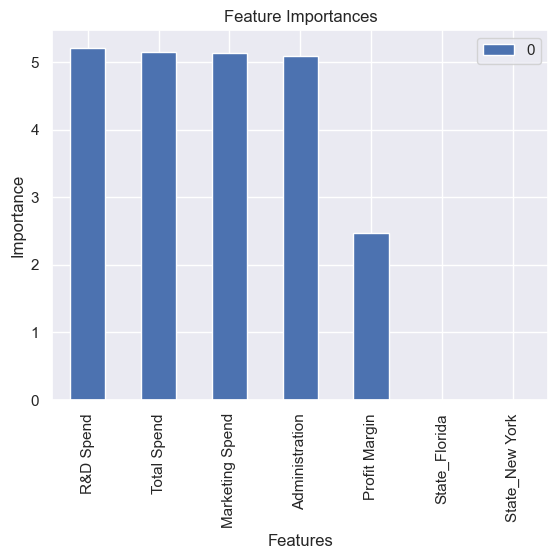

In [389]:
# Compute feature importances using Mutual Information
feature_scores = mutual_info_regression(X_train, y_train)
coef = pd.Series(feature_scores, index=['R&D Spend', 'Administration', 'Marketing Spend', 'Total Spend', 'Profit Margin', 'State_Florida', 'State_New York']).sort_values(ascending=False)
coef = coef.to_frame()

# Plot the feature importances
plt.figure(figsize=(15, 6))
coef.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [390]:
#A12
X_train.drop(['State_Florida','State_New York'], axis=1, inplace=True)

In [391]:
#A13
X_train.reset_index(drop=True, inplace=True)

In [392]:
#A14
cols2 = X_train.columns

In [393]:
def prepare(d):
    d.reset_index(drop=True, inplace=True)
    d['Total Spend'] = d['R&D Spend'] + d['Administration'] + d['Marketing Spend']
    d['Profit Margin'] = (d['Profit'] / d['Total Spend']) * 100
    d = drop_outlier(d,'Administration')
    d = drop_outlier(d,'Profit')
    X_test = d.drop(['Profit'], axis=1)
    y_test = d['Profit']
    enc_data = pd.DataFrame(encoder.transform(X_test[['State']]).toarray())
    enc_data.columns = encoder.get_feature_names_out()
    X_test.drop(['State'], axis=1, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    X_test = X_test.join(enc_data)
    cols1 = X_test.columns
    X_test = scaler.transform(X_test)
    X_test = pd.DataFrame(X_test, columns=cols1)
    X_test.drop(['State_Florida','State_New York'], axis=1, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    cols2 = X_test.columns
    
    return X_test, y_test
    
    

In [394]:
X_test, y_test = prepare(test)

In [395]:
X_test.head()

,R&D Spend,Administration,Marketing Spend,Total Spend,Profit Margin
0,1.509954,1.439986,1.485212,1.502735,0.042301
1,0.072026,0.067330,0.068850,0.070348,0.007718
2,0.122221,0.115246,0.118292,0.120349,0.009463
3,0.282761,0.268499,0.276425,0.280271,0.014686
4,1.436225,1.369604,1.412590,1.429291,0.041074


In [396]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeRegressor()
    elif input_ml_algo == 'RF':
        model = RandomForestRegressor()
    elif input_ml_algo == 'XGBC':
        model = XGBRegressor()
    elif input_ml_algo == 'LGBMC':
        model = LGBMRegressor()
    elif input_ml_algo=='LR':
        model=LinearRegression()
    elif input_ml_algo=='KNN':
        model=KNeighborsRegressor()
    return model

In [397]:
from sklearn.model_selection import cross_val_score

def evaluate(model):
    y_train_pred = model.predict(X_train) # Train predictions
    y_pred = model.predict(X_test) # Test predictions
    
    print('Train r2 score:', r2_score(y_train, y_train_pred))
    print('Test r2 score:', r2_score(y_test, y_pred))
    
    print('train_mse1:', mean_squared_error(y_train, y_train_pred))
    print('test_mse1:', mean_squared_error(y_test, y_pred))
    
    print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print('Cross-Validation r2 scores:', cv_scores)
    print('Mean Cross-Validation r2 score:', np.mean(cv_scores))
    
    plt.subplots(figsize=(8, 5))
    plt.scatter(y_test, y_pred)
    plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), c='r')
    plt.title('Predicted vs Actual')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.grid()
    plt.show()


Train r2 score: 1.0
Test r2 score: 0.9985093256216796
train_mse1: 0.0
test_mse1: 2244006.212442283
Train RMSE: 0.0
Test RMSE: 1498.0007384651994
Cross-Validation r2 scores: [0.99967904 0.99809825 0.99373409 0.99990181 0.99395858]
Mean Cross-Validation r2 score: 0.9970743542272464


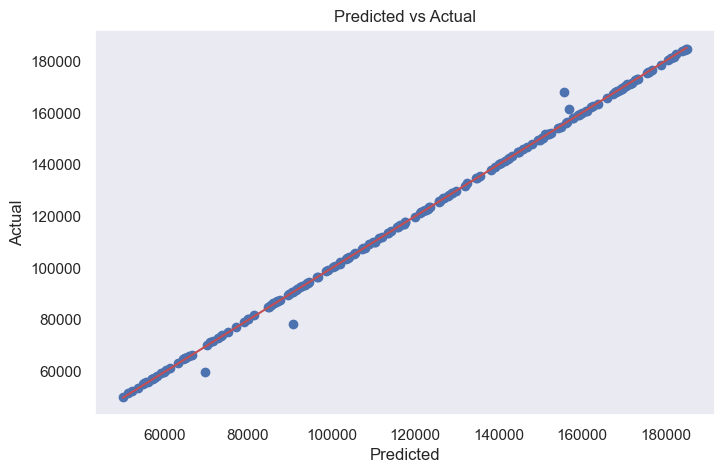

In [398]:
model1 = model_to_use("DT")

model1.fit(X_train, y_train)
evaluate(model1)

Train r2 score: 0.9996361086518001
Test r2 score: 0.9986395030224805
train_mse1: 582665.8033175884
test_mse1: 2048041.956018986
Train RMSE: 763.3254897601602
Test RMSE: 1431.098164354558
Cross-Validation r2 scores: [0.99954865 0.99762215 0.99330865 0.9995718  0.99567819]
Mean Cross-Validation r2 score: 0.9971458874562067


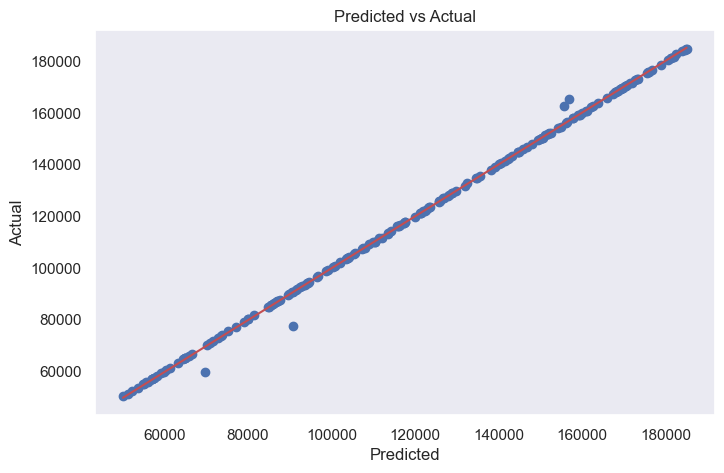

In [399]:
model2 = model_to_use("RF")

model2.fit(X_train, y_train)
evaluate(model2)

Train r2 score: 0.9999966191904174
Test r2 score: 0.9991450314361355
train_mse1: 5413.379958154044
test_mse1: 1287038.1329801143
Train RMSE: 73.57567504382168
Test RMSE: 1134.4770306093087
Cross-Validation r2 scores: [0.99971197 0.99625327 0.99526612 0.99977902 0.99639369]
Mean Cross-Validation r2 score: 0.9974808136802638


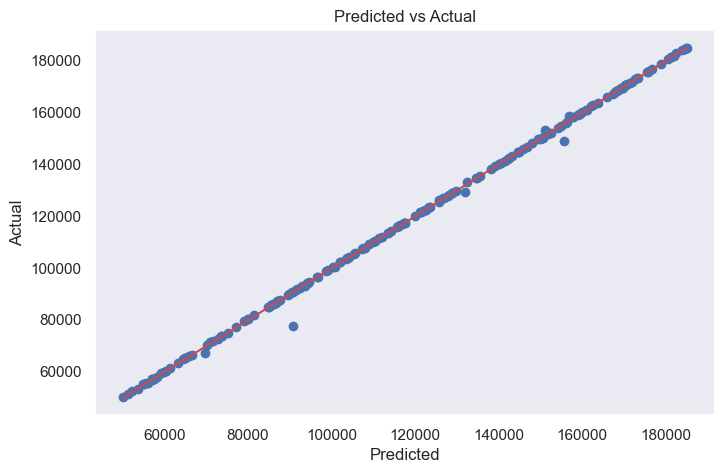

In [400]:
model3 = model_to_use("XGBC")

model3.fit(X_train, y_train)
evaluate(model3)

Train r2 score: 0.9989559514190897
Test r2 score: 0.9983531221726991
train_mse1: 1671739.1279235757
test_mse1: 2479149.121594533
Train RMSE: 1292.9575120333907
Test RMSE: 1574.531397462284
Cross-Validation r2 scores: [0.99951861 0.99682593 0.99327873 0.99975737 0.99580666]
Mean Cross-Validation r2 score: 0.9970374615535242


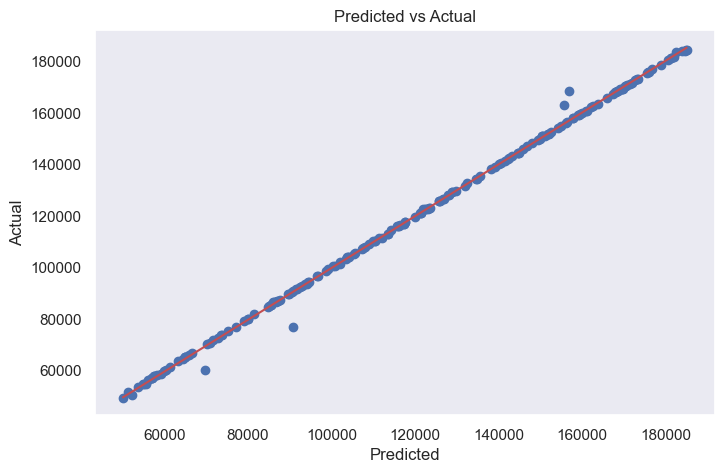

In [401]:
model4 = model_to_use("LGBMC")

model4.fit(X_train, y_train)
evaluate(model4)

## The Linear Regression (LR) model demonstrates exceptional performance with high r2 scores of 0.9993 on the train set and 0.9992 on the test set. Furthermore, it achieves remarkable accuracy with a Train RMSE of 1076.8 and a Test RMSE of 1090.6. These results highlight the LR model's strong predictive capability and its ability to accurately estimate the target variable(Profit).

Train r2 score: 0.9992758662044127
Test r2 score: 0.9992098647248867
train_mse1: 1159488.9568066008
test_mse1: 1189440.4920420551
Train RMSE: 1076.79568944466
Test RMSE: 1090.6147312603362
Cross-Validation r2 scores: [0.99960934 0.99702292 0.9983157  0.99982389 0.99914818]
Mean Cross-Validation r2 score: 0.9987840070630087


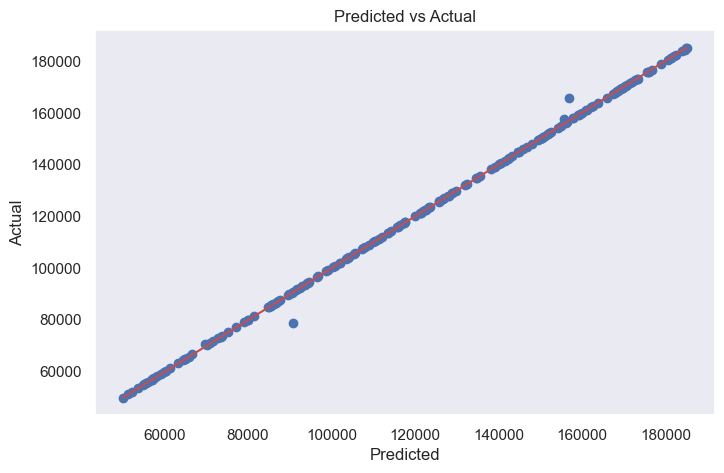

In [402]:
model5 = model_to_use("LR")

model5.fit(X_train, y_train)
evaluate(model5)

Train r2 score: 0.9890828904878796
Test r2 score: 0.9940107810655561
train_mse1: 17480565.05122183
test_mse1: 9015949.218710164
Train RMSE: 4180.976566691307
Test RMSE: 3002.6570264867355
Cross-Validation r2 scores: [0.99925669 0.9890056  0.95934122 0.99749457 0.96216463]
Mean Cross-Validation r2 score: 0.9814525439938858


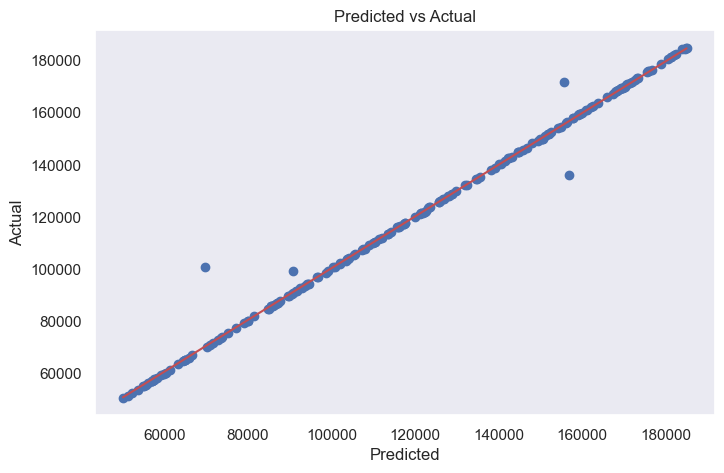

In [403]:
model6 = model_to_use("KNN")

model6.fit(X_train, y_train)
evaluate(model6)